# Importing Necessary libraries and importing the dataset

In [28]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 

In [29]:
df = pd.read_csv("datasets/tv_marketing/tvmarketing.csv")
df.head()

,TV,Sales
0,230.1,22.1
1,44.5,10.4
2,17.2,9.3
3,151.5,18.5
4,180.8,12.9


# Info of dataset and Null checking 

In [30]:
df.shape # Got around 200 records

(200, 2)

In [31]:
df.describe()

,TV,Sales
count,200.000000,200.000000
mean,147.042500,14.022500
std,85.854236,5.217457
min,0.700000,1.600000
25%,74.375000,10.375000
50%,149.750000,12.900000
75%,218.825000,17.400000
max,296.400000,27.000000


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   TV      200 non-null    float64
 1   Sales   200 non-null    float64
dtypes: float64(2)
memory usage: 3.3 KB


In [33]:
df.isnull().sum()

TV       0
Sales    0
dtype: int64

In [34]:
#No null values so no preprocessing for null values is required.

In [35]:
df.corr() # a correlation of 0.78 looks good so lets try linear regression 

,TV,Sales
TV,1.000000,0.782224
Sales,0.782224,1.000000


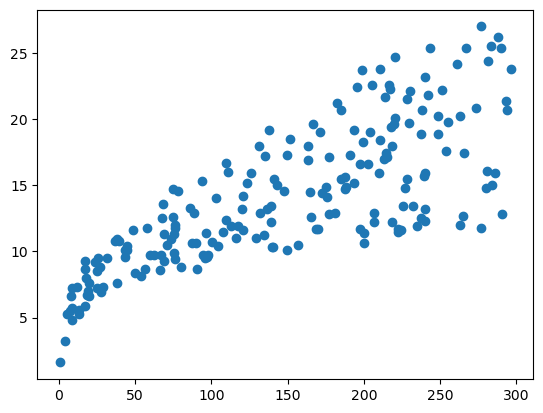

In [36]:
plt.scatter(df["TV"],df["Sales"])

In [37]:
#based on the data visualization we can fit out a line => linear regression

In [38]:
# There is no encoding required as there is no categorical columns 

In [39]:
# No scaling required as there is one variable /feature that we are using to predict 

In [40]:
# Split the dataset into dependent and independent variables

In [41]:
X = df[["TV"]]
y = df["Sales"]

In [42]:
X.head()

,TV
0,230.1
1,44.5
2,17.2
3,151.5
4,180.8


In [43]:
y.head()

0    22.1
1    10.4
2     9.3
3    18.5
4    12.9
Name: Sales, dtype: float64

# Test train split

In [44]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.8)

# Train the Model

In [45]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [46]:
lr.fit(X_train,y_train)

LinearRegression()

In [47]:
# Predict the values
y_pred = lr.predict(X_test)

Text(0.5, 1.0, 'Actual vs Predicted Values')

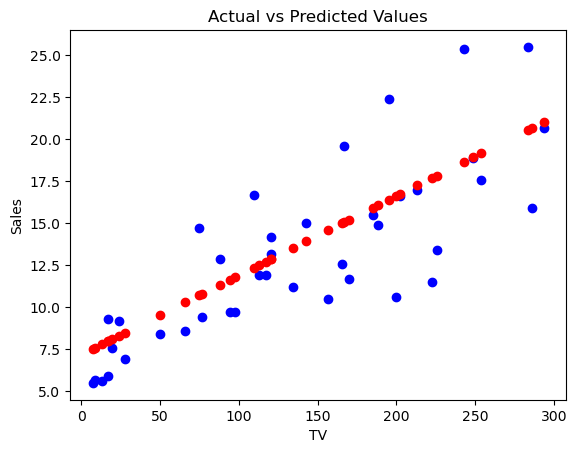

In [48]:
# Plotting the actual values
plt.scatter(X_test, y_test, color='blue', label='Actual')

# Plotting the predicted values
plt.scatter(X_test, y_pred, color='red', label='Predicted')

# Adding labels and title to the plot
plt.xlabel('TV')
plt.ylabel('Sales')
plt.title('Actual vs Predicted Values')

Text(0.5, 1.0, 'Actual vs Predicted Values')

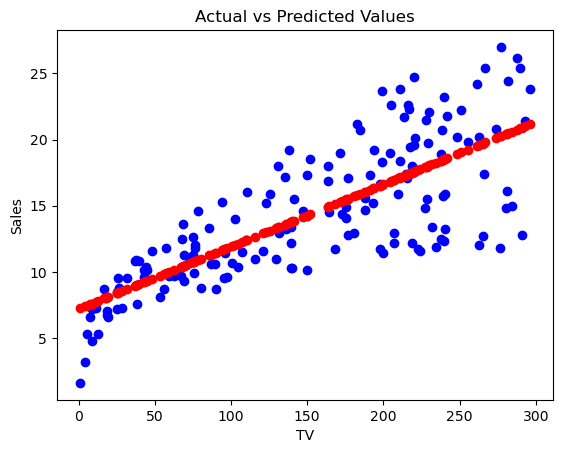

In [49]:
# Plotting the actual values
plt.scatter(X_train, y_train, color='blue', label='Actual')

# Plotting the predicted values
plt.scatter(X_train, lr.predict(X_train), color='red', label='Predicted')

# Adding labels and title to the plot
plt.xlabel('TV')
plt.ylabel('Sales')
plt.title('Actual vs Predicted Values')

# Evaluate the model

In [50]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
print("The mean absolute error is: ",mean_absolute_error(y_test, lr.predict(X_test)))
print("The mean squared error: ",mean_squared_error(y_test, lr.predict(X_test)))

The mean absolute error is:  2.367178856218783
The mean squared error:  9.131799188434366


# Conclusion   

In [51]:
m = lr.coef_[0] 
c = lr.intercept_
print(f"The slope is: {m} and intercept is: {c}")

The slope is: 0.047148829550703104 and intercept is: 7.1932079932123285


### So what does slope and intercept mean ? 

*Lets consider the scenario so every unit increase in tv there is a increase of 0.047 unit increase in sales. 
As for intercept, this means that when TV equals 0, the model predicts sales will be 7.14 units. This suggests there is some baseline level of sales even without any TV advertising spend*

As for conclusion based on metrics of the model , the MAE suggests the model's predictions are off from the actual values by around 2.6 units on average. This seems reasonably accurate.